# Importing Libraries

In [ ]:
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap


from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample, shuffle
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


READ DATABASE

In [ ]:
database=pd.read_csv('/content/drive/MyDrive/CSE437/data.csv')

# DATA VISUALIZATION

In [ ]:
print(database.shape)

(4653, 9)


In [ ]:
database.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


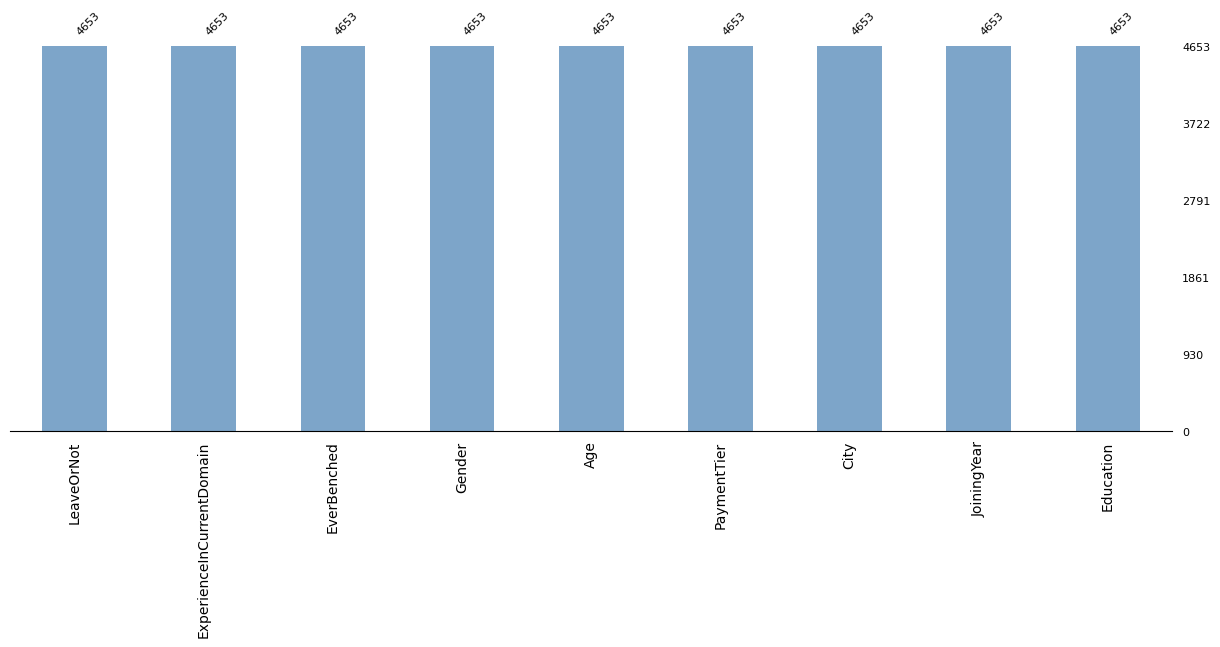

In [ ]:
A= '#7DA5C9'

color = [A, A, A, A, A, A, A, A, A, A,'#4B6378','#4B6378']
fig, ax = plt.subplots(figsize=(15, 5), dpi=100)
fig.patch.set_facecolor('#ffffff')
ax.set_facecolor('#ffffff')
msno.bar(database, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', size=10, weight='normal',  alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
plt.show()

In [ ]:
database.isnull().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [ ]:
database.info()
category_cols = database.select_dtypes(include=['object'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


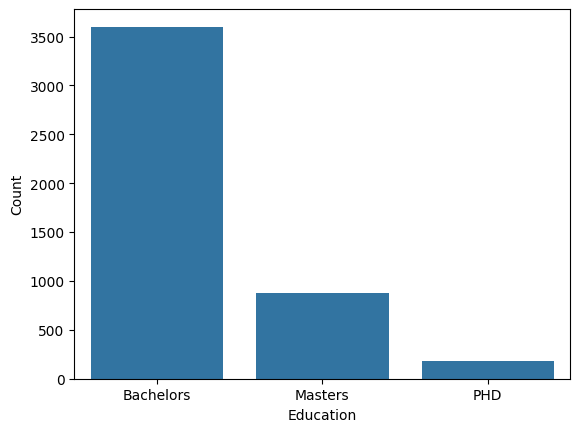

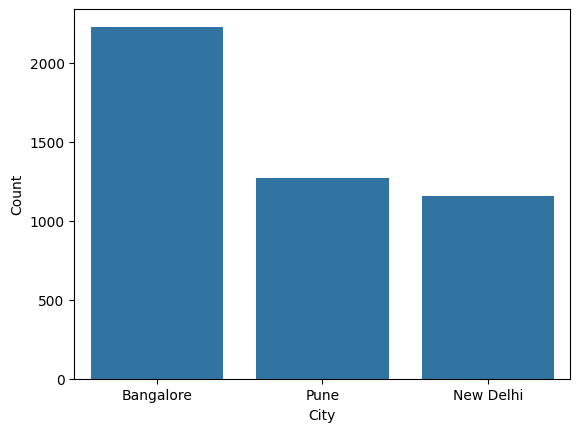

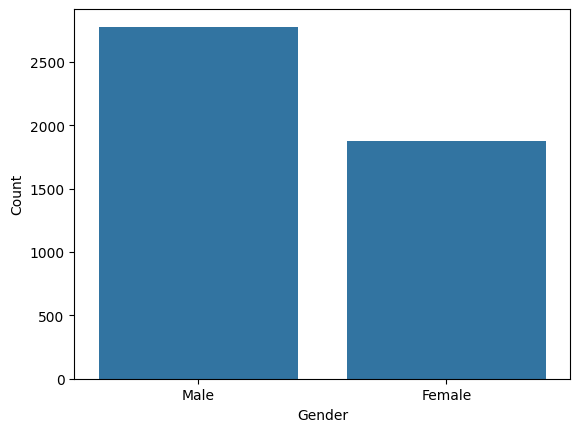

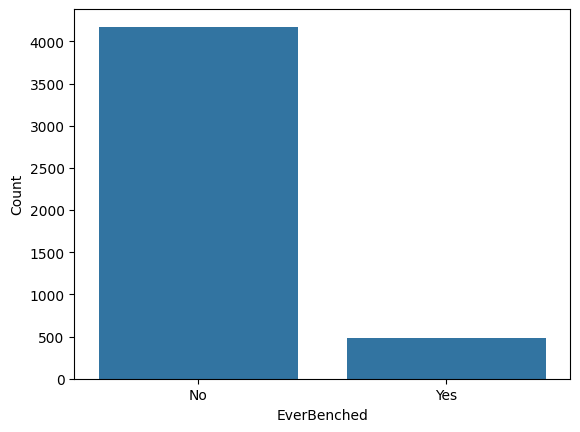

In [ ]:
for col in category_cols:
    sns.countplot(data=database, x=col, order=database[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Categorical Data Processing

In [ ]:
database = pd.read_csv('/content/drive/MyDrive/CSE437/data.csv')
enc = LabelEncoder()
database['Gender'] = enc.fit_transform(database['Gender'])
database['EverBenched'] = enc.fit_transform(database['EverBenched'])


def custom_combiner(feature, category):
    return str(category)


enc2 = OneHotEncoder(sparse_output=False, feature_name_combiner=custom_combiner)
education_array = database['Education'].values.reshape(-1, 1)
city_array=database['City'].values.reshape(-1, 1)

education_array = enc2.fit_transform(education_array)
column_name1 = enc2.get_feature_names_out()

city_array=enc2.fit_transform(city_array)
column_name2 = enc2.get_feature_names_out()

def encoding(column_name,column_array):
    for i in range(len(column_name)):
        database[column_name[i]]=column_array[:,i]
        database[column_name[i]] = database[column_name[i]].astype(int)

    return database


database=encoding(column_name1,education_array)
database=encoding(column_name2,city_array)

database=database.drop(columns=['City'])
database=database.drop(columns=['Education'])

database.head(10)



,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,0,1
2,2014,3,38,0,0,2,0,1,0,0,0,1,0
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,0,1
5,2016,3,22,1,0,0,0,1,0,0,1,0,0
6,2015,3,38,1,0,0,0,1,0,0,0,1,0
7,2016,3,34,0,0,2,1,1,0,0,1,0,0
8,2016,3,23,1,0,1,0,1,0,0,0,0,1
9,2017,2,37,1,0,2,0,0,1,0,0,1,0


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   JoiningYear                4653 non-null   int64
 1   PaymentTier                4653 non-null   int64
 2   Age                        4653 non-null   int64
 3   Gender                     4653 non-null   int64
 4   EverBenched                4653 non-null   int64
 5   ExperienceInCurrentDomain  4653 non-null   int64
 6   LeaveOrNot                 4653 non-null   int64
 7   Bachelors                  4653 non-null   int64
 8   Masters                    4653 non-null   int64
 9   PHD                        4653 non-null   int64
 10  Bangalore                  4653 non-null   int64
 11  New Delhi                  4653 non-null   int64
 12  Pune                       4653 non-null   int64
dtypes: int64(13)
memory usage: 472.7 KB


In [ ]:
database.shape

(4653, 13)

In [ ]:
database.describe()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,0.597034,0.102729,2.905652,0.343864,0.773909,0.187621,0.038470,0.478831,0.248657,0.272512
std,1.863377,0.561435,4.826087,0.490547,0.303638,1.558240,0.475047,0.418344,0.390451,0.192348,0.499605,0.432281,0.445300
min,2012.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,28.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,3.000000,32.000000,1.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2018.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering

In [ ]:
database.head()

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
0,2017,3,34,1,0,0,0,1,0,0,1,0,0
1,2013,1,28,0,0,3,1,1,0,0,0,0,1
2,2014,3,38,0,0,2,0,1,0,0,0,1,0
3,2016,3,27,1,0,5,1,0,1,0,1,0,0
4,2017,3,24,1,1,2,1,0,1,0,0,0,1


In [ ]:
database.count()

,0
JoiningYear,4653
PaymentTier,4653
Age,4653
Gender,4653
EverBenched,4653
ExperienceInCurrentDomain,4653
LeaveOrNot,4653
Bachelors,4653
Masters,4653
PHD,4653


#### SELECTION


In [ ]:
correlation=database.corr()
correlation

,JoiningYear,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Bachelors,Masters,PHD,Bangalore,New Delhi,Pune
JoiningYear,1.000000,-0.096078,0.013165,-0.012213,0.049353,-0.036525,0.181705,-0.178347,0.191759,-0.001362,-0.104668,0.141744,-0.020167
PaymentTier,-0.096078,1.000000,0.007631,0.235119,0.019207,0.018314,-0.197638,0.180820,-0.199632,0.011966,0.293730,-0.102642,-0.229910
Age,0.013165,0.007631,1.000000,-0.003866,-0.016135,-0.134643,-0.051126,0.011365,-0.010192,-0.004029,0.039918,-0.032461,-0.013273
Gender,-0.012213,0.235119,-0.003866,1.000000,0.019653,0.008745,-0.220701,0.016843,-0.021561,0.007133,0.209460,-0.155877,-0.083685
EverBenched,0.049353,0.019207,-0.016135,0.019653,1.000000,0.001408,0.078438,0.039043,-0.013930,-0.056639,0.018590,-0.029246,0.007534
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,0.008745,0.001408,1.000000,-0.030504,0.005852,-0.006584,0.000637,0.011654,-0.007608,-0.005690
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.220701,0.078438,-0.030504,1.000000,-0.118176,0.145801,-0.038938,-0.154996,-0.033341,0.206264
Bachelors,-0.178347,0.180820,0.011365,0.016843,0.039043,0.005852,-0.118176,1.000000,-0.889129,-0.370069,0.337067,-0.426035,0.035406
Masters,0.191759,-0.199632,-0.010192,-0.021561,-0.013930,-0.006584,0.145801,-0.889129,1.000000,-0.096126,-0.323998,0.381977,-0.007299
PHD,-0.001362,0.011966,-0.004029,0.007133,-0.056639,0.000637,-0.038938,-0.370069,-0.096126,1.000000,-0.075407,0.151214,-0.062189


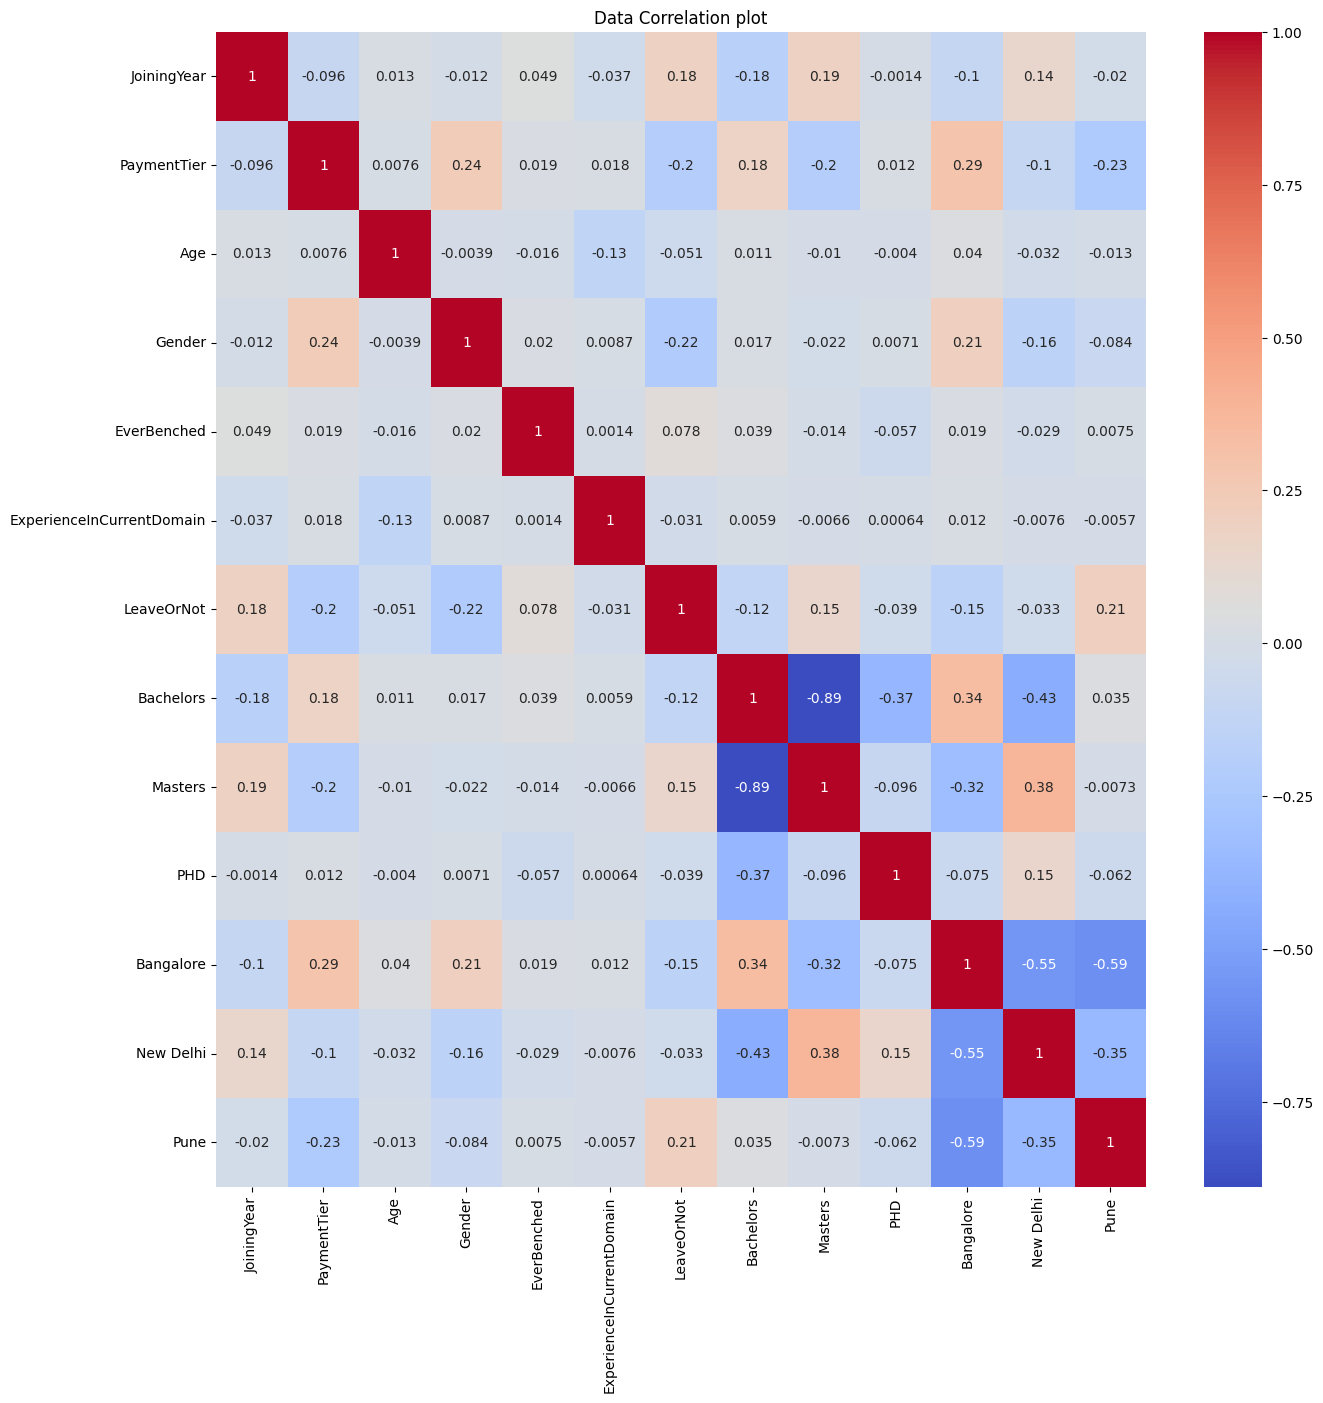

In [ ]:
#Using Heatmap to show correlation between features

fig = plt.figure(figsize=(15, 15))
corr_plot = sns.heatmap(database.corr(),annot = True, cmap = 'coolwarm' )
plt.title("Data Correlation plot")
plt.show()

In [ ]:
database=database.drop(columns=['Masters'])

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64


<Axes: xlabel='LeaveOrNot'>

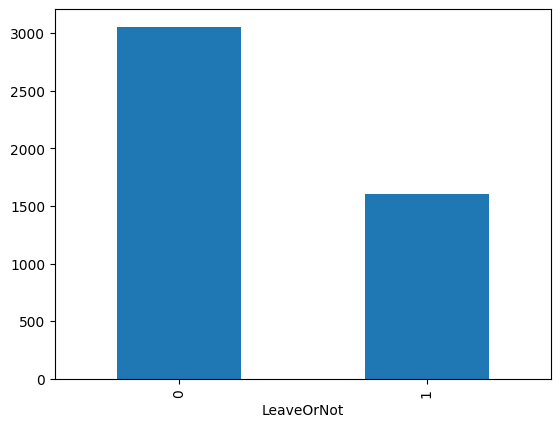

In [ ]:
print(database["LeaveOrNot"].value_counts())

database.groupby('LeaveOrNot').size().plot(kind='bar',
                                       y = "LeaveOrNot",
                                       label = "Type")

In [ ]:
# Separate the minority and majority classes
majority_class = database[database['LeaveOrNot'] == 0]
minority_class = database[database['LeaveOrNot'] == 1]


# Perform oversampling on the minority class
minority_oversampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),
    random_state=42
)

# Combine the majority class with the oversampled minority class
database = pd.concat([majority_class, minority_oversampled])

# Shuffle the combined dataset
database = shuffle(database, random_state=42)

# Check the new shape and class distribution
print("New dataset shape:", database.shape)
print("Class distribution:\n", database['LeaveOrNot'].value_counts())


New dataset shape: (6106, 12)
Class distribution:
 LeaveOrNot
0    3053
1    3053
Name: count, dtype: int64


LeaveOrNot
0    3053
1    3053
Name: count, dtype: int64


<Axes: xlabel='LeaveOrNot'>

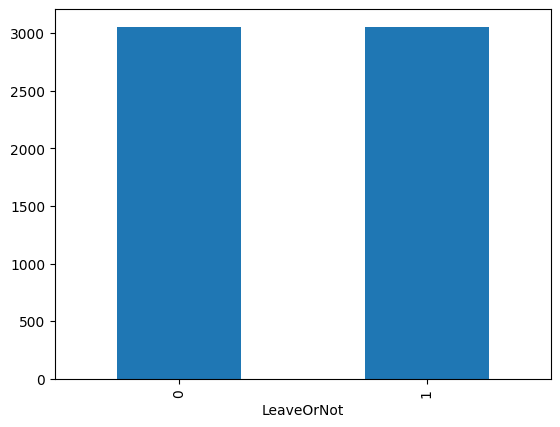

In [ ]:
print(database["LeaveOrNot"].value_counts())

database.groupby('LeaveOrNot').size().plot(kind='bar',
                                       y = "LeaveOrNot",
                                       label = "Type")

# Min-Max Scalar


In [ ]:
print("Keys of dataset:\n", database.keys())

Keys of dataset:
 Index(['JoiningYear', 'PaymentTier', 'Age', 'Gender', 'EverBenched',
       'ExperienceInCurrentDomain', 'LeaveOrNot', 'Bachelors', 'PHD',
       'Bangalore', 'New Delhi', 'Pune'],
      dtype='object')


In [ ]:
y=database["LeaveOrNot"]
X=database.drop(["LeaveOrNot"],axis=1)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X.max(axis=0)))

per-feature minimum before scaling:
 JoiningYear                  2012
PaymentTier                     1
Age                            22
Gender                          0
EverBenched                     0
ExperienceInCurrentDomain       0
Bachelors                       0
PHD                             0
Bangalore                       0
New Delhi                       0
Pune                            0
dtype: int64
per-feature maximum before scaling:
 JoiningYear                  2018
PaymentTier                     3
Age                            41
Gender                          1
EverBenched                     1
ExperienceInCurrentDomain       7
Bachelors                       1
PHD                             1
Bangalore                       1
New Delhi                       1
Pune                            1
dtype: int64


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X.max(axis=0)))

per-feature minimum before scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum before scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=0, stratify = y)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (4274, 11)
y_train shape: (4274,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (1832, 11)
y_test shape: (1832,)


#Model 01 - Logistic regression

In [ ]:
model_1=LogisticRegression(solver='liblinear')
model_1.fit(X_train,y_train)
y_hat=model_1.predict(X_test)
accuracy1 = accuracy_score(y_test,y_hat)
precision1=precision_score(y_test,y_hat)
recall1=recall_score(y_test,y_hat)
print('Logistic Regression :',accuracy1*100,"%")

Logistic Regression : 68.44978165938865 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       916
           1       0.70      0.65      0.67       916

    accuracy                           0.68      1832
   macro avg       0.69      0.68      0.68      1832
weighted avg       0.69      0.68      0.68      1832



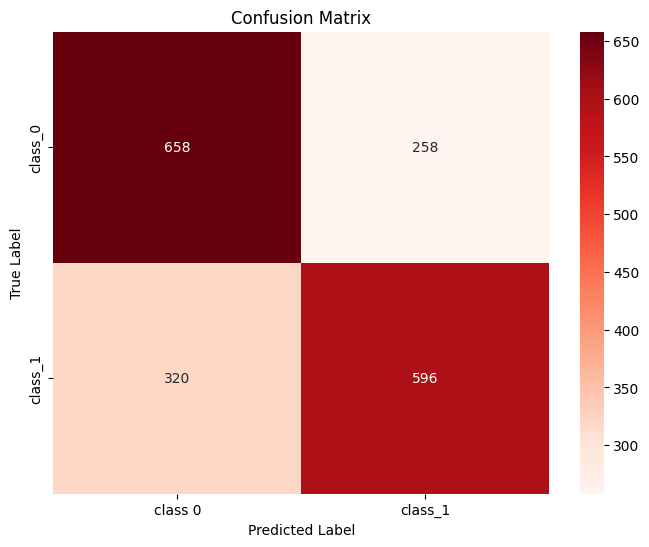

F1 Score: 0.6734463276836158


In [ ]:
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['class 0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate the F1 score

print('='*50)
f = f1_score(y_test, y_hat)
print(f"F1 Score: {f}")
print('='*50)



# Model 02 - KNN Classifier

In [ ]:
model_2= KNeighborsClassifier(n_neighbors = 6)
model_2.fit(X_train,y_train)
y_hat=model_2.predict(X_test)
accuracy2= accuracy_score(y_test,y_hat)
precision2=precision_score(y_test,y_hat)
recall2=recall_score(y_test,y_hat)

print('KNN :',accuracy2*100,"%")

KNN : 80.89519650655022 %


In [ ]:
print(classification_report(y_test,y_hat))


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       916
           1       0.85      0.75      0.80       916

    accuracy                           0.81      1832
   macro avg       0.81      0.81      0.81      1832
weighted avg       0.81      0.81      0.81      1832



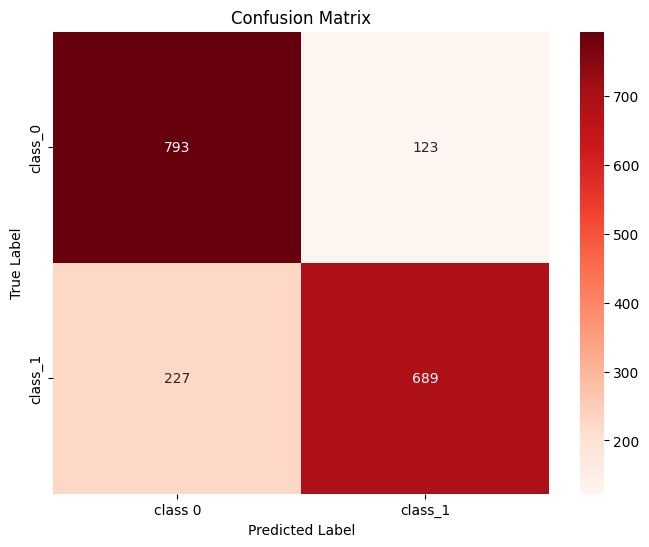

F1 Score: 0.7974537037037037


In [ ]:

conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['class 0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate the F1 score

print('='*50)
f = f1_score(y_test, y_hat)
print(f"F1 Score: {f}")
print('='*50)


# Model 03 -  DecisionTree

In [ ]:
model_3= DecisionTreeClassifier()
model_3.fit(X_train,y_train)
y_hat=model_3.predict(X_test)
accuracy3 = accuracy_score(y_test,y_hat)
precision3=precision_score(y_test,y_hat)
recall3=recall_score(y_test,y_hat)

print('Decision Tree Accuracy :',accuracy3*100,"%")

Decision Tree Accuracy : 84.00655021834062 %


In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       916
           1       0.84      0.85      0.84       916

    accuracy                           0.84      1832
   macro avg       0.84      0.84      0.84      1832
weighted avg       0.84      0.84      0.84      1832



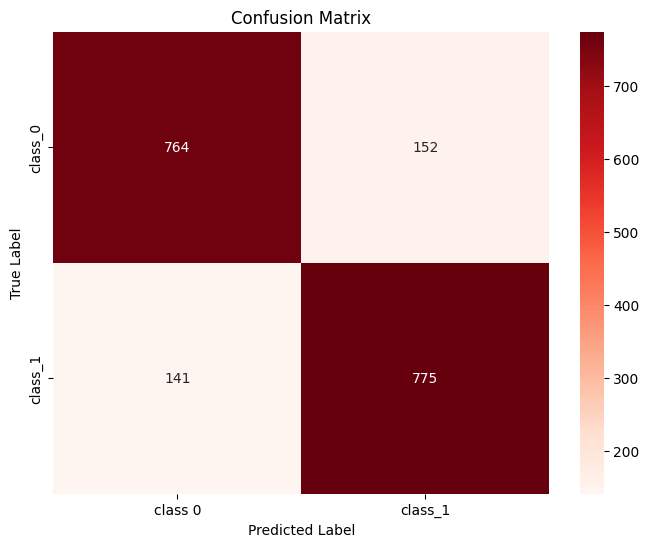

F1 Score: 0.8410200759631037


In [ ]:
conf_matrix = confusion_matrix(y_test, y_hat)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['class 0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate the F1 score

print('='*50)
f = f1_score(y_test, y_hat)
print(f"F1 Score: {f}")
print('='*50)


#Model 04 - Bernoulli Naive Bayes

In [ ]:
model_4 = BernoulliNB()
model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred)
precision4=precision_score(y_test,y_pred)
recall4=recall_score(y_test,y_pred)
print(f" Bernoulli NB Accuracy: {accuracy4*100}%")


 Bernoulli NB Accuracy: 62.44541484716157%


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       916
           1       0.64      0.56      0.60       916

    accuracy                           0.62      1832
   macro avg       0.63      0.62      0.62      1832
weighted avg       0.63      0.62      0.62      1832



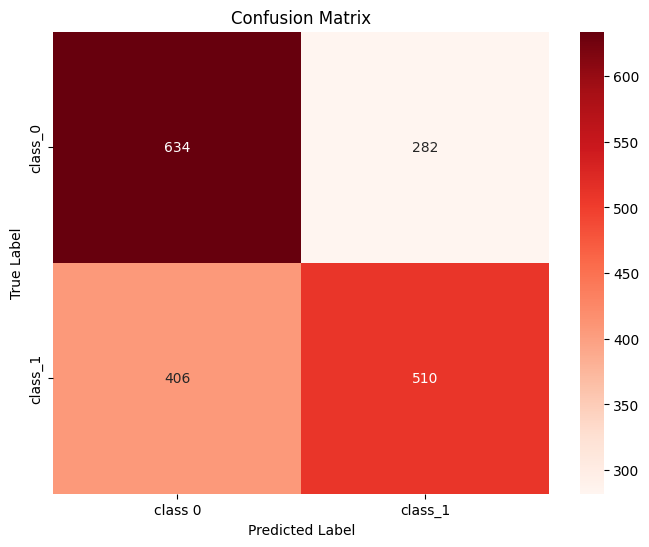

F1 Score: 0.5971896955503513


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['class 0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate the F1 score

print('='*50)
f = f1_score(y_test, y_pred)
print(f"F1 Score: {f}")
print('='*50)


# Model 05- Neural Network

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()


In [ ]:
model5 = Sequential()
model5.add(Dense(64, activation='relu'))
model5.add(Dense(32, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','precision','recall'])
history=model5.fit(X_train, y_train, epochs=50, batch_size=25, validation_data=(X_test, y_test))
model5.summary()





Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6287 - loss: 0.6536 - precision: 0.6667 - recall: 0.5252 - val_accuracy: 0.6916 - val_loss: 0.5778 - val_precision: 0.7414 - val_recall: 0.5884
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7064 - loss: 0.5648 - precision: 0.7388 - recall: 0.6448 - val_accuracy: 0.7096 - val_loss: 0.5507 - val_precision: 0.7000 - val_recall: 0.7336
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7258 - loss: 0.5352 - precision: 0.7367 - recall: 0.6829 - val_accuracy: 0.7211 - val_loss: 0.5298 - val_precision: 0.7330 - val_recall: 0.6954
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7315 - loss: 0.5245 - precision: 0.7521 - recall: 0.6703 - val_accuracy: 0.7456 - val_loss: 0.5242 - val_precision: 0.7354 - val_recall: 0.7675
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7459 - loss: 0.5077 - precision: 0.7743 - recall: 0.6882 - val_accuracy: 0.7467 - val_loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8119 - loss: 0.4151 - precision: 0.8020 - recall: 0.8138
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       916
           1       0.64      0.56      0.60       916

    accuracy                           0.62      1832
   macro avg       0.63      0.62      0.62      1832
weighted avg       0.63      0.62      0.62      1832



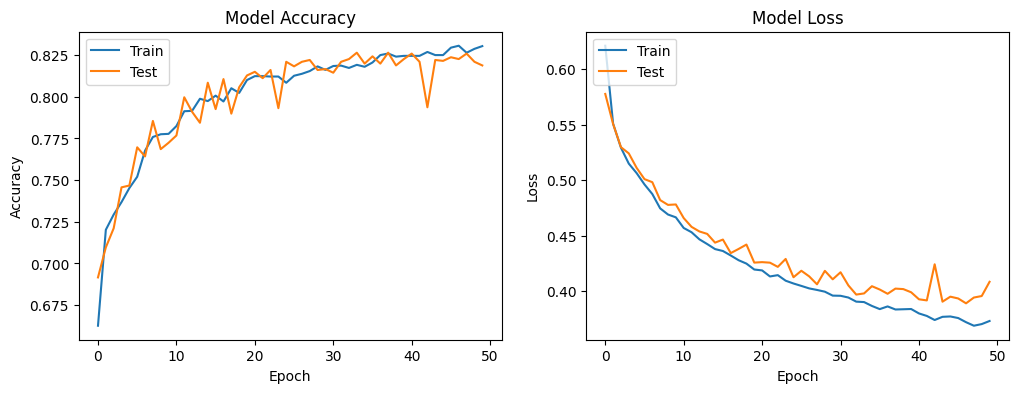

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model5.evaluate(X_test, y_test)
print(classification_report(y_test, y_pred))
accuracy5 = accuracy_score(y_test,y_hat)
precision5=precision_score(y_test,y_hat)
recall5=recall_score(y_test,y_hat)
plot_history(history)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


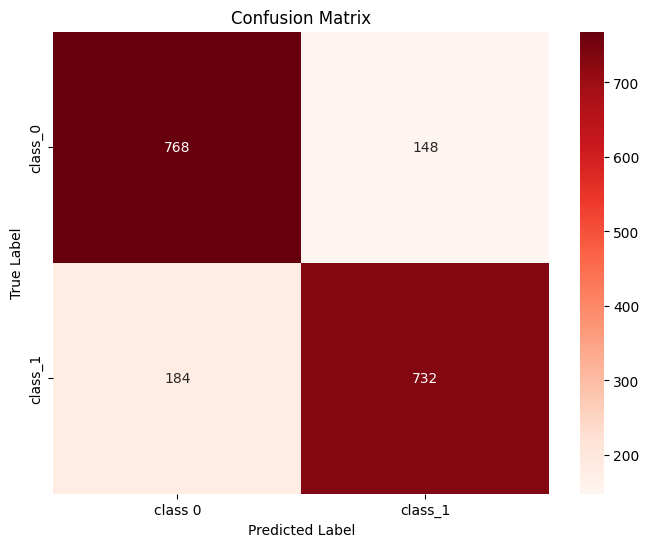

F1 Score: 0.8151447661469933


In [ ]:
y_pred = model5.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['class 0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Calculate the F1 score

print('='*50)
f = f1_score(y_test, y_pred)
print(f"F1 Score: {f}")
print('='*50)

# Graphs


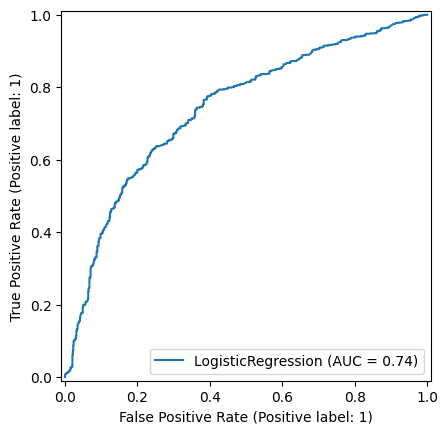

In [ ]:
RocCurveDisplay.from_estimator(model_1,X_test,y_test)

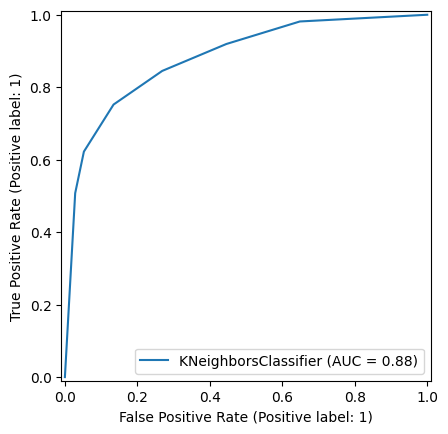

In [ ]:
RocCurveDisplay.from_estimator(model_2,X_test,y_test)

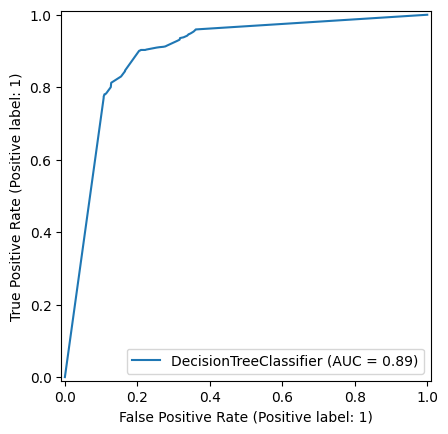

In [ ]:
RocCurveDisplay.from_estimator(model_3,X_test,y_test)

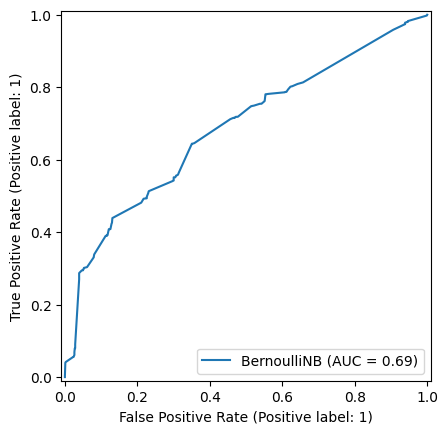

In [ ]:
RocCurveDisplay.from_estimator(model_4,X_test,y_test)

#Performance

In [ ]:
models = {
    "Logistic Regression": accuracy1*100,
    "K-Nearest Neighbors": accuracy2*100,
    "Decision Tree": accuracy3*100,
    "Bernoulli Naive Bayes": accuracy4*100,
    "Neural Netowrk": accuracy5*100
}

name = list(models.keys())
accu = list(models.values())
error = []
for i in list(models.values()):
  error.append(100-i)


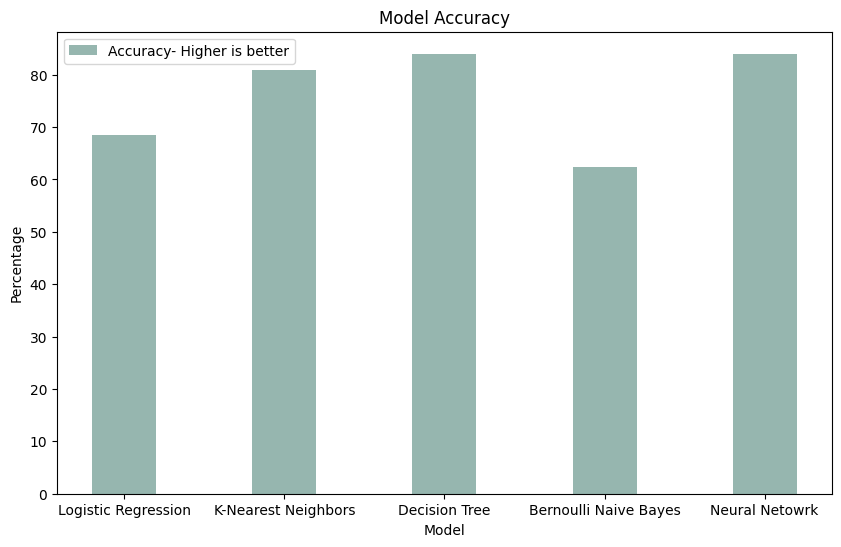

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(name, accu, label='Accuracy- Higher is better', color='#96b6af', width = 0.4)
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.legend()
plt.show()

### Error

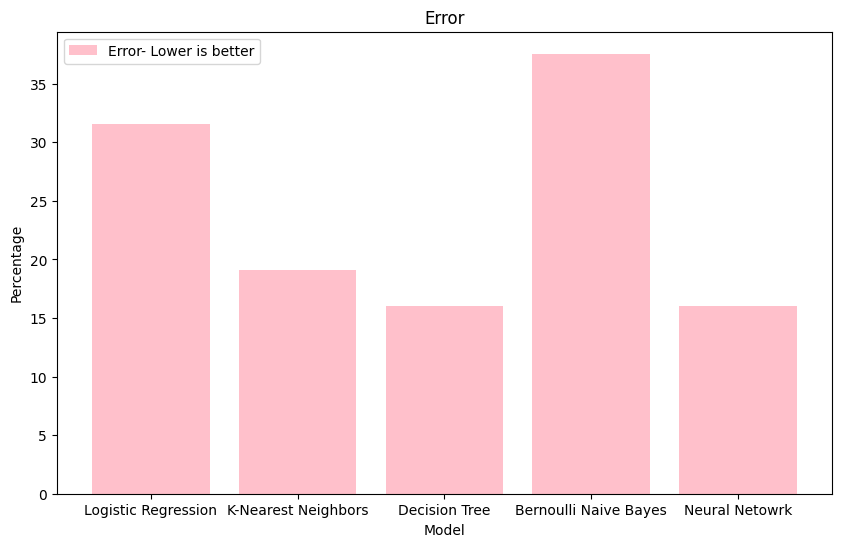

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(name, error , label='Error- Lower is better', color='pink')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Error')
plt.legend()
plt.show()

## Precision & Recall

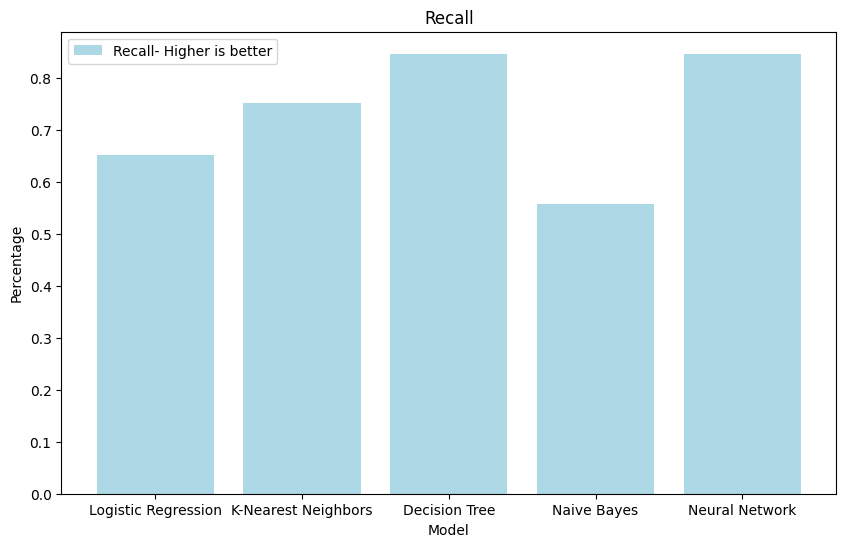

In [ ]:
# plotting recall
tick_label = ['Logistic Regression', 'K-Nearest Neighbors','Decision Tree', 'Naive Bayes','Neural Network']
height = [recall1 , recall2,  recall3, recall4, recall5]

plt.figure(figsize=(10, 6))
plt.bar(tick_label, height , label='Recall- Higher is better', color='lightblue')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Recall')
plt.legend()
plt.show()

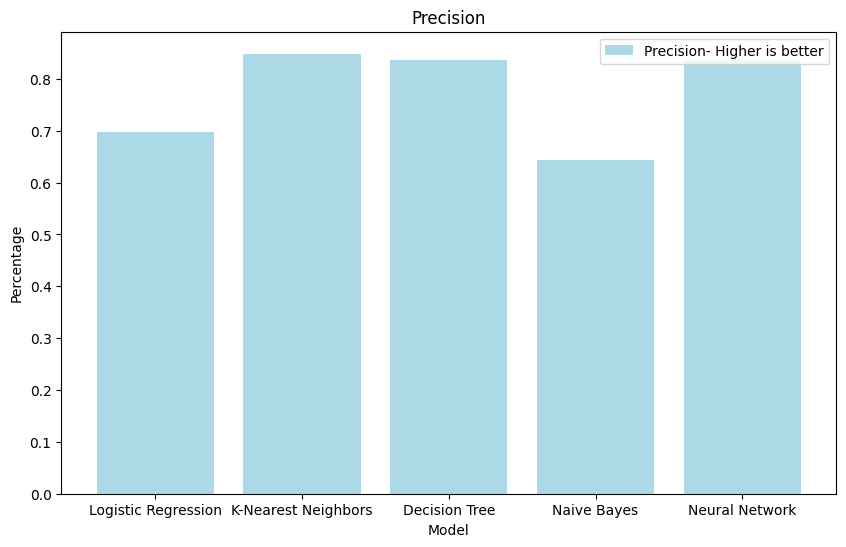

In [ ]:
# plotting Precision
tick_label = ['Logistic Regression', 'K-Nearest Neighbors','Decision Tree', 'Naive Bayes','Neural Network']
height = [precision1 , precision2,  precision3, precision4, precision5]

plt.figure(figsize=(10, 6))
plt.bar(tick_label, height , label='Precision- Higher is better', color='lightblue')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.title('Precision')
plt.legend()
plt.show()